<h1>Project Python for Data-Science</h1>
<h2>Alexandre LEVRET</h2>

In [2]:
# Import the libraries

In [71]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 1/ Data-préparation (pandas)

In [90]:
file_train = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn"
names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '1st spectral band', '2nd spectral band', '3rd spectral band', '4th spectral band', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', 'Class']
df_train = pd.read_csv(file_train, sep = "\s+", names = names, index_col = False)
df_train = df_train[['1st spectral band', '2nd spectral band', '3rd spectral band', '4th spectral band', 'Class']]
df_train.head()

,1st spectral band,2nd spectral band,3rd spectral band,4th spectral band,Class
0,92,112,118,85,3
1,84,103,104,81,3
2,84,99,104,78,3
3,84,99,104,81,3
4,76,99,104,81,3


## 2/ Data-visualisation (matplotlib)

In [103]:
import matplotlib.pyplot as plt

In [155]:
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, 4].values

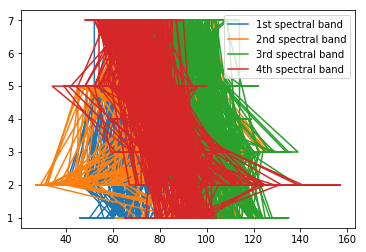

In [156]:
plt.plot(X_train, y_train)
plt.legend(['1st spectral band', '2nd spectral band', '3rd spectral band', '4th spectral band'])
plt.show()

## 3/ Modélisation (scikit learn)

In [177]:
# Import test file

In [187]:
file_test = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst"
names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '1st spectral band', '2nd spectral band', '3rd spectral band', '4th spectral band', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', 'Class']
df_test = pd.read_csv(file_test, sep = "\s+", names = names, index_col = False)
df_test = df_test[['1st spectral band', '2nd spectral band', '3rd spectral band', '4th spectral band', 'Class']]
df_test.head()
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, 4].values

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
performances = {}
algo = RandomForestClassifier()
modele = algo.fit(X_train, y_train)
for i in range(8):
    modele      = algo.fit(X_train, y_train)
    performance = modele.score(X_test, y_test)
    print(i, performance)
    performances[i] = [performance]

0 0.8285
1 0.824
2 0.8305
3 0.8225
4 0.8235
5 0.8245
6 0.828
7 0.831


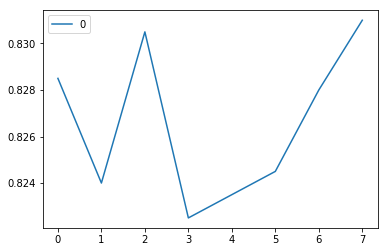

In [182]:
pd.DataFrame.from_dict(performances).T.plot()

In [185]:
classifier = RandomForestClassifier(n_estimators = 20)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [186]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[447   1   4   2   7   0]
 [  1 215   0   1   5   2]
 [  8   0 338  40   0  11]
 [  0   0  53  86   1  71]
 [ 10  11   4   1 188  23]
 [  0   1  16  53  13 387]]
             precision    recall  f1-score   support

          1       0.96      0.97      0.96       461
          2       0.94      0.96      0.95       224
          3       0.81      0.85      0.83       397
          4       0.47      0.41      0.44       211
          5       0.88      0.79      0.83       237
          7       0.78      0.82      0.80       470

avg / total       0.83      0.83      0.83      2000

0.8305


In [52]:
#x = df_train[['Class']]

In [16]:
import matplotlib
matplotlib.use('GTKAgg')
 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

/Users/Alexandre/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/Alexandre/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/Alexandre/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/Alexandre/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/Alexandre/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/Alexandre/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.p

In [22]:
X = df_train[['1st spectral band', '2nd spectral band', '3rd spectral band', '4th spectral band']]
y = df_train[['Class']]
h = 0.2

In [32]:
x_min, x_max = X['1st spectral band'].min() - 1, X['4th spectral band'].max() + 1
y_min, y_max = y['Class'].min() - 1, y['Class'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [33]:
print(X.shape)
print(y.shape)

(4435, 4)
(4435, 1)


ValueError: x and y must be the same size

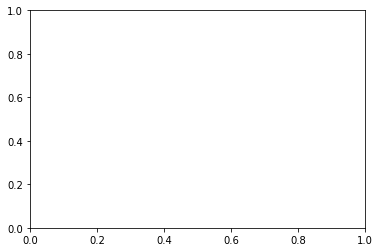

In [34]:
plt.figure()
plt.scatter(X, y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()

In [73]:
y[['1st spectral band']]

,1st spectral band
0,92
1,84
2,84
3,84
4,76
5,76
6,80
7,80
8,76
9,76


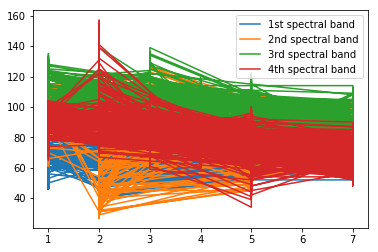

In [84]:
#plt.plot(x, y)
#plt.legend(['1st spectral band', '2nd spectral band', '3rd spectral band', '4th spectral band'])
#plt.show()

In [92]:
X = df[["1st spectral band", "2nd spectral band", "3rd spectral band", "4th spectral band"]]
Y = df[["Class"]]

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [94]:
algo = RandomForestClassifier()
modele = algo.fit(x_train, y_train)
modele.score(x_test, y_test)

/Users/Alexandre/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8629395852119026